In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

import time

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [4]:
df = pd.read_csv('../Data/Breast_Cancer_Wisconsin(Diagnostic)_DataSet.csv', low_memory = False)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

## Checking for Missing Values

In [6]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

All features are complete, only "Unnamed:32" is completely null so we'll just drop this.

## Checking How Many Are M and B

In [7]:
counts = df['diagnosis'].value_counts()
print(counts) 

B    357
M    212
Name: diagnosis, dtype: int64


357 datapoints are Benign and 212 datapoints are Malignant.

## Dropping Unnecessary Features and Converting Diagnosis to Binary

In [8]:
df = df.drop(['Unnamed: 32','id'],axis = 1)

In [9]:
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Correlation Matrix

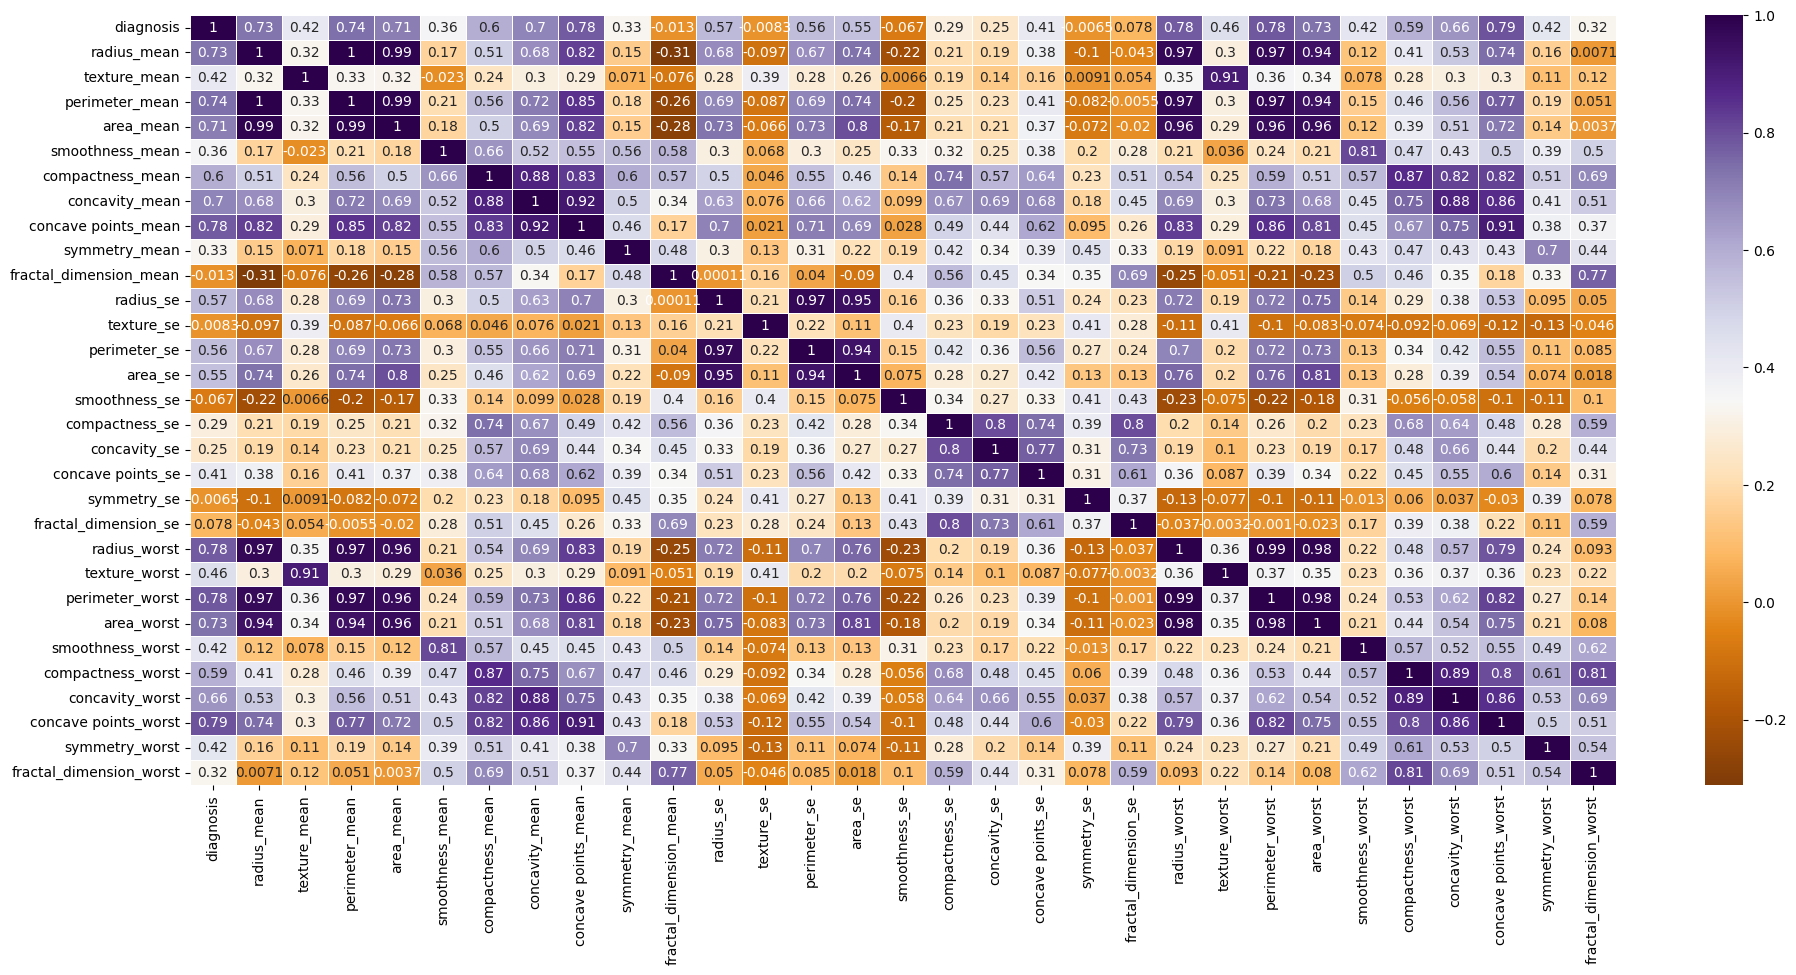

In [11]:
corrMatrix = df.corr()
plt.figure(figsize=(23, 10))
color_palette = 'PuOr'
hm = sns.heatmap(corrMatrix,annot=True, linewidth=.5, cmap=color_palette)

Variables that represent different metrics of the same characteristic (for example "worst radius" and "mean radius", "worst texture" and "mean texture" have a strong positive correlation). Characteristics such as "mean radius", "mean perimeter" , "mean area", "mean concavity", "mean concave points", "worst radius", "worst perimeter", "worst area" and "worst concave points" have strong negative correlation with the diagnosis. This indicates that when the cancer is malignant (target = 1) the values of these variables are higher.

## Checking how many features have a correlation more than 0.6

In [12]:
corr_abs = df.corr().abs()

relevant_features = corr_abs[corr_abs['diagnosis'] > 0.6].index.tolist()
relevant_features.remove('diagnosis')

print("Number of features having a correlation of more than 0.6 with the target variable:", len(relevant_features))

Number of features having a correlation of more than 0.6 with the target variable: 10


## Checking if data is Linear or not

We will see the relationship between some of the highly correlated features.

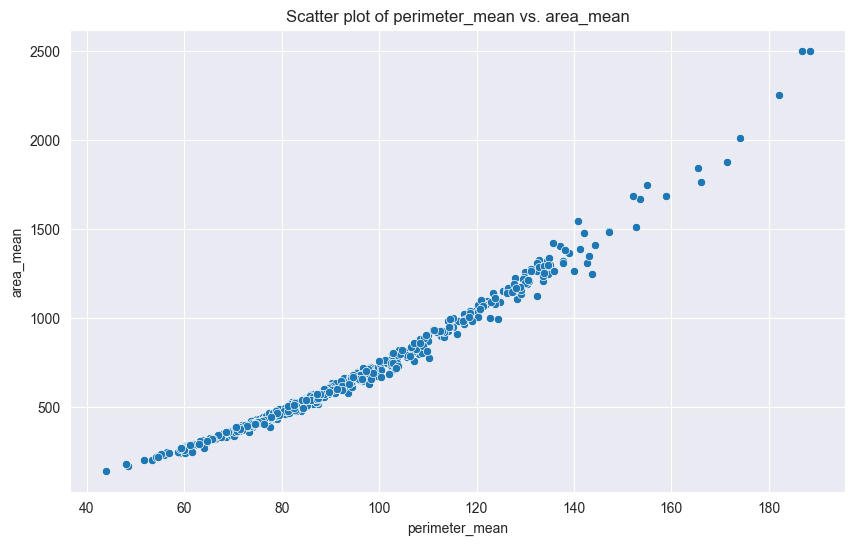

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(x='perimeter_mean', y='area_mean', data=df)

plt.title('Scatter plot of perimeter_mean vs. area_mean')
plt.xlabel('perimeter_mean')
plt.ylabel('area_mean')

plt.show()

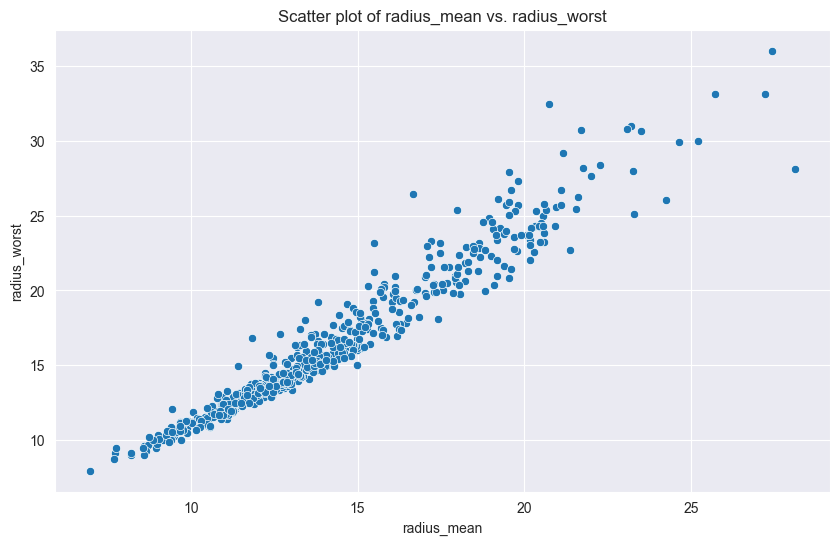

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(x='radius_mean', y='radius_worst', data=df)

plt.title('Scatter plot of radius_mean vs. radius_worst')
plt.xlabel('radius_mean')
plt.ylabel('radius_worst')

plt.show()

## Balancing the Data

Since our dataset was imbalanced, we have to balance it to avoid any bias.The technique we'll be using is ADASYN.

ADASYN (Adaptive Synthetic Sampling) is a method used to balance the class distribution of an imbalanced dataset. 
It generates synthetic samples of the minority class, increasing its representation in the dataset, while not affecting the majority class. ADASYN focuses on the samples that are harder to learn by the classifier by creating more synthetic samples for those data points. This can improve the classifier's accuracy in predicting the minority class.

In [15]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

ada = ADASYN(random_state=42)
X_resampled, y_resampled = ada.fit_resample(X, y)

In [33]:
print("Samples per class after ADASYN:")
print(y_resampled.value_counts())

Samples per class after ADASYN:
1    358
0    357
Name: diagnosis, dtype: int64


## Scaling the Data

Since our dataset has variables that have different scales, we will normalize it.

In [34]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X_resampled)
scaled_df = pd.DataFrame(normalized_data, columns=X_resampled.columns)

In [35]:
scaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## Neighbourhood Component Analysis (NCA)

The reason I'm using NCA instead of PCA is that NCA is a supervised method that takes into account the class labels of the data, whereas PCA is an unsupervised method that does not consider the class information. Since the goal of this model is to predict the diagnosis of breast cancer, it's important to use a method that incorporates the class labels in the feature selection process. NCA is a well-known method for supervised feature selection that can help identify the most informative features for classification therefore I'm using it.

In [36]:
nca = NeighborhoodComponentsAnalysis(n_components=10)
scaled_df_nca = nca.fit_transform(scaled_df, y_resampled)

# Model

## Splitting the Data in Training and Testing

In [37]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df_nca, y_resampled, test_size=0.2, random_state=42)

### Checking how many samples will be used for training and testing the model

#### Training:

In [38]:
train_diagnosis_counts = y_train.value_counts()

print(train_diagnosis_counts)

0    289
1    283
Name: diagnosis, dtype: int64


#### Testing:

In [39]:
diagnosis_counts = y_test.value_counts()

print(diagnosis_counts)

1    75
0    68
Name: diagnosis, dtype: int64


## Performing KNN

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()
knn.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = knn.predict(X_test)
testing_time = time.time() - start_time

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print(f"\nTraining Score: {train_score:.2f}")
print(f"Testing Score: {test_score:.2f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Confusion Matrix:
 [[64  4]
 [ 1 74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        68
           1       0.95      0.99      0.97        75

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143


Training Score: 0.99
Testing Score: 0.97
Training Time: 0.00 seconds
Testing Time: 0.00 seconds


# Results

Key to help read the results:

- **True positive (TP):** The number of instances where the model correctly predicted that the patient has malignant tumor.
- **True negative (TN):** The number of instances where the model correctly predicted that the patient has benign tumor.
- **False negative (FN):** The number of instances where the model predicted that the patient has benign tumor, but the patient actually has malignant tumor.
- **False positive (FP):**  The number of instances where the model predicted that the patient has malignant tumor, but the patient actually has benign tumor.

There are two classes: 
- Class 0 represents benign tumor
- Class 1 represents malignant tumor

### Results of KNN Model:

Out of 143 data points:
- The number of true negatives (TN) is 64. This means that 64 patients were correctly classified as not having breast cancer.
- The number of true positives (TP) is 74. This means that 74 patients were correctly classified as having breast cancer.
- The number of false positives (FP) is 4. This means that 4 patients were falsely classified as having breast cancer when they did not.
- The number of false negatives (FN) is 1. This means that 1 patients was incorrectly classified as not having cancer when they actually did.

The **train score is 0.99**, which indicates that the model was able to correctly predict the class of 99% of the samples in the training set. 
The **test score is 0.97**, which indicates that the model was able to correctly predict the class of 97% of the samples in the test set.